In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from pickle import load
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from model.nns import *
from model.bls import BroadLearningSystem
from model.elm import ELMRegressor, GenELMRegressor
from model.random_layer import RandomLayer, MLPRandomLayer, RBFRandomLayer, GRBFRandomLayer
from model.pyESN import ESN
from evaluation import *# metric_calculation, pred_bls_elm, pred_esn, load_model_config
from sklearn.manifold import TSNE


%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=1

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=1


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:70: FutureWarning: Pass neg_label=-1, pos_label=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [2]:
%matplotlib inline
rcParams["figure.subplot.wspace"] = 0.05
rcParams["figure.subplot.hspace"] = 0.15
rcParams["figure.titlesize"] = 'xx-large'
rcParams["figure.titleweight"] = 'bold'
rcParams['axes.titlesize'] = 'xx-large'
rcParams['axes.titleweight'] = 'bold'
rcParams['axes.labelsize'] = 'xx-large'
rcParams['axes.labelweight'] = 'bold'
rcParams["ytick.labelsize"] = 'xx-large'
rcParams["xtick.labelsize"] = 'xx-large'
rcParams["axes.xmargin"] = 0.05

### Evaluation

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
discontinuous_scheduled_sampling_is inferring... 0.0% completed
discontinuous_scheduled_sampling_is inferring... 50.0% completed
<class 'tensorflow.python.framework.ops.Tensor'>
music_transformer inferring... 0.0% completed
<class 'tensorflow.python.framework.ops.Tensor'>
music_transformer inferring... 50.0% completed
music_transformer inferring... 100.0% completed
horizon_forcing_5 inferring... 0.0% completed
horizon_forcing_5 inferring... 50.0% completed
horizon_forcing_10 inferring... 0.0% completed
horizon_forcing_10 i

/tf/workspace/yong.zhuang001/HorizonForcing/model/bls.py:49: RuntimeWarning: overflow encountered in exp
  return (2/(1+np.exp(-2*x)))-1


discontinuous_scheduled_sampling_is inferring... 0.0% completed
discontinuous_scheduled_sampling_is inferring... 33.33333333333333% completed
discontinuous_scheduled_sampling_is inferring... 66.66666666666666% completed
<class 'tensorflow.python.framework.ops.Tensor'>
music_transformer inferring... 0.0% completed
<class 'tensorflow.python.framework.ops.Tensor'>
music_transformer inferring... 33.33333333333333% completed
music_transformer inferring... 66.66666666666666% completed
music_transformer inferring... 100.0% completed
horizon_forcing_5 inferring... 0.0% completed
horizon_forcing_5 inferring... 33.33333333333333% completed
horizon_forcing_5 inferring... 66.66666666666666% completed
horizon_forcing_10 inferring... 0.0% completed
horizon_forcing_10 inferring... 33.33333333333333% completed
horizon_forcing_10 inferring... 66.66666666666666% completed
horizon_forcing_15 inferring... 0.0% completed
horizon_forcing_15 inferring... 33.33333333333333% completed
horizon_forcing_15 inferr

/tf/workspace/yong.zhuang001/HorizonForcing/model/bls.py:49: RuntimeWarning: overflow encountered in exp
  return (2/(1+np.exp(-2*x)))-1


discontinuous_scheduled_sampling_is inferring... 0.0% completed
discontinuous_scheduled_sampling_is inferring... 33.33333333333333% completed
discontinuous_scheduled_sampling_is inferring... 66.66666666666666% completed
<class 'tensorflow.python.framework.ops.Tensor'>
music_transformer inferring... 0.0% completed
<class 'tensorflow.python.framework.ops.Tensor'>
music_transformer inferring... 33.33333333333333% completed
music_transformer inferring... 66.66666666666666% completed
music_transformer inferring... 100.0% completed
horizon_forcing_5 inferring... 0.0% completed
horizon_forcing_5 inferring... 33.33333333333333% completed
horizon_forcing_5 inferring... 66.66666666666666% completed
horizon_forcing_10 inferring... 0.0% completed
horizon_forcing_10 inferring... 33.33333333333333% completed
horizon_forcing_10 inferring... 66.66666666666666% completed
horizon_forcing_15 inferring... 0.0% completed
horizon_forcing_15 inferring... 33.33333333333333% completed
horizon_forcing_15 inferr

/tf/workspace/yong.zhuang001/HorizonForcing/model/bls.py:49: RuntimeWarning: overflow encountered in exp
  return (2/(1+np.exp(-2*x)))-1


discontinuous_scheduled_sampling_is inferring... 0.0% completed
discontinuous_scheduled_sampling_is inferring... 33.33333333333333% completed
discontinuous_scheduled_sampling_is inferring... 66.66666666666666% completed
<class 'tensorflow.python.framework.ops.Tensor'>
music_transformer inferring... 0.0% completed
<class 'tensorflow.python.framework.ops.Tensor'>
music_transformer inferring... 33.33333333333333% completed
music_transformer inferring... 66.66666666666666% completed
music_transformer inferring... 100.0% completed
horizon_forcing_5 inferring... 0.0% completed
horizon_forcing_5 inferring... 33.33333333333333% completed
horizon_forcing_5 inferring... 66.66666666666666% completed
horizon_forcing_10 inferring... 0.0% completed
horizon_forcing_10 inferring... 33.33333333333333% completed
horizon_forcing_10 inferring... 66.66666666666666% completed
horizon_forcing_15 inferring... 0.0% completed
horizon_forcing_15 inferring... 33.33333333333333% completed
horizon_forcing_15 inferr

BLS           ELM     SSFS  \
$Lorenz$         $\mathbb{E}_\gamma$      7.201  1.562071e+05    5.619   
                 $\mathbb{P}_\gamma$      2.000  0.000000e+00   73.000   
                 $\mathbb{E}_\zeta$       0.519  1.182701e+04    0.409   
                 $\mathbb{P}_\zeta$       2.000  0.000000e+00   71.000   
                 $\mathbb{E}_\mu$         0.295  3.790000e-01    0.201   
                 $\mathbb{P}_\mu$         2.000  0.000000e+00   73.000   
$Accelerometer$  $\mathbb{E}_\gamma$     43.834  3.530000e-01    0.362   
                 $\mathbb{P}_\gamma$     80.000  6.500000e+01   80.000   
                 $\mathbb{E}_\zeta$      59.822  4.570000e-01    0.439   
                 $\mathbb{P}_\zeta$      66.000  4.500000e+01   88.000   
                 $\mathbb{E}_\mu$         0.312  2.310000e-01    0.222   
                 $\mathbb{P}_\mu$        64.000  4.500000e+01   79.000   
$Gait$ $Force$   $\mathbb{E}_\gamma$   1809.867  1.297275e+08  153.489   
                 $\mathbb{P}_\gamma$    182.000  1.800000e+01  151.000   
                 $\mathbb{E}_\zeta$       5.791  4.347546e+05    0.479   
                 $\mathbb{P}_\zeta$     178.000  1.800000e+01  159.000   
                 $\mathbb{E}_\mu$         0.221  4.980000e-01    0.323   
                 $\mathbb{P}_\mu$       183.000  9.300000e+01  115.000   
$Roaming$ $Worm$ $\mathbb{E}_\gamma$      2.228  4.283000e+00    2.240   
                 $\mathbb{P}_\gamma$     52.000  1.400000e+01   53.000   
                 $\mathbb{E}_\zeta$       0.843  1.745000e+00    0.838   
                 $\mathbb{P}_\zeta$      52.000  1.200000e+01   56.000   
                 $\mathbb{E}_\mu$         0.565  6.480000e-01    0.462   
                 $\mathbb{P}_\mu$        42.000  1.800000e+01   55.000   
$Electricity$    $\mathbb{E}_\gamma$  14797.506  4.969790e+02  208.360   
                 $\mathbb{P}_\gamma$     41.000  6.000000e+00    0.000   
                 $\mathbb{E}_\zeta$      27.924  8.180000e-01    0.403   
                 $\mathbb{P}_\zeta$      39.000  9.000000e+00    0.000   
                 $\mathbb{E}_\mu$         0.026  4.250000e-01    0.165   
                 $\mathbb{P}_\mu$         0.000  1.000000e+00    0.000   

                                          MTF  Informer  Autoformer      HF5  \
$Lorenz$         $\mathbb{E}_\gamma$    8.206     7.305       7.442    3.206   
                 $\mathbb{P}_\gamma$   17.000     0.000       0.000  121.000   
                 $\mathbb{E}_\zeta$     0.610     0.530       0.537    0.235   
                 $\mathbb{P}_\zeta$    16.000     0.000       0.000  121.000   
                 $\mathbb{E}_\mu$       0.294     0.307       0.307    0.114   
                 $\mathbb{P}_\mu$      17.000     0.000       0.000  123.000   
$Accelerometer$  $\mathbb{E}_\gamma$    0.592     0.280       0.502    0.294   
                 $\mathbb{P}_\gamma$    4.000   111.000       0.000  123.000   
                 $\mathbb{E}_\zeta$     0.769     0.341       0.635    0.366   
                 $\mathbb{P}_\zeta$     3.000   111.000       0.000  123.000   
                 $\mathbb{E}_\mu$       0.399     0.177       0.355    0.184   
                 $\mathbb{P}_\mu$       3.000   110.000       0.000  123.000   
$Gait$ $Force$   $\mathbb{E}_\gamma$  180.482   293.610     237.578  162.573   
                 $\mathbb{P}_\gamma$  109.000     0.000       0.000  136.000   
                 $\mathbb{E}_\zeta$     0.576     0.949       0.769    0.514   
                 $\mathbb{P}_\zeta$   112.000     0.000       1.000  139.000   
                 $\mathbb{E}_\mu$       0.364     0.871       0.465    0.328   
                 $\mathbb{P}_\mu$      80.000     0.000       0.000  115.000   
$Roaming$ $Worm$ $\mathbb{E}_\gamma$    3.669     2.294       2.813    2.333   
                 $\mathbb{P}_\gamma$   19.000    49.000      14.000   53.000   
                 $\mathbb{E}_\zeta$     1.460     0.874       1.086  

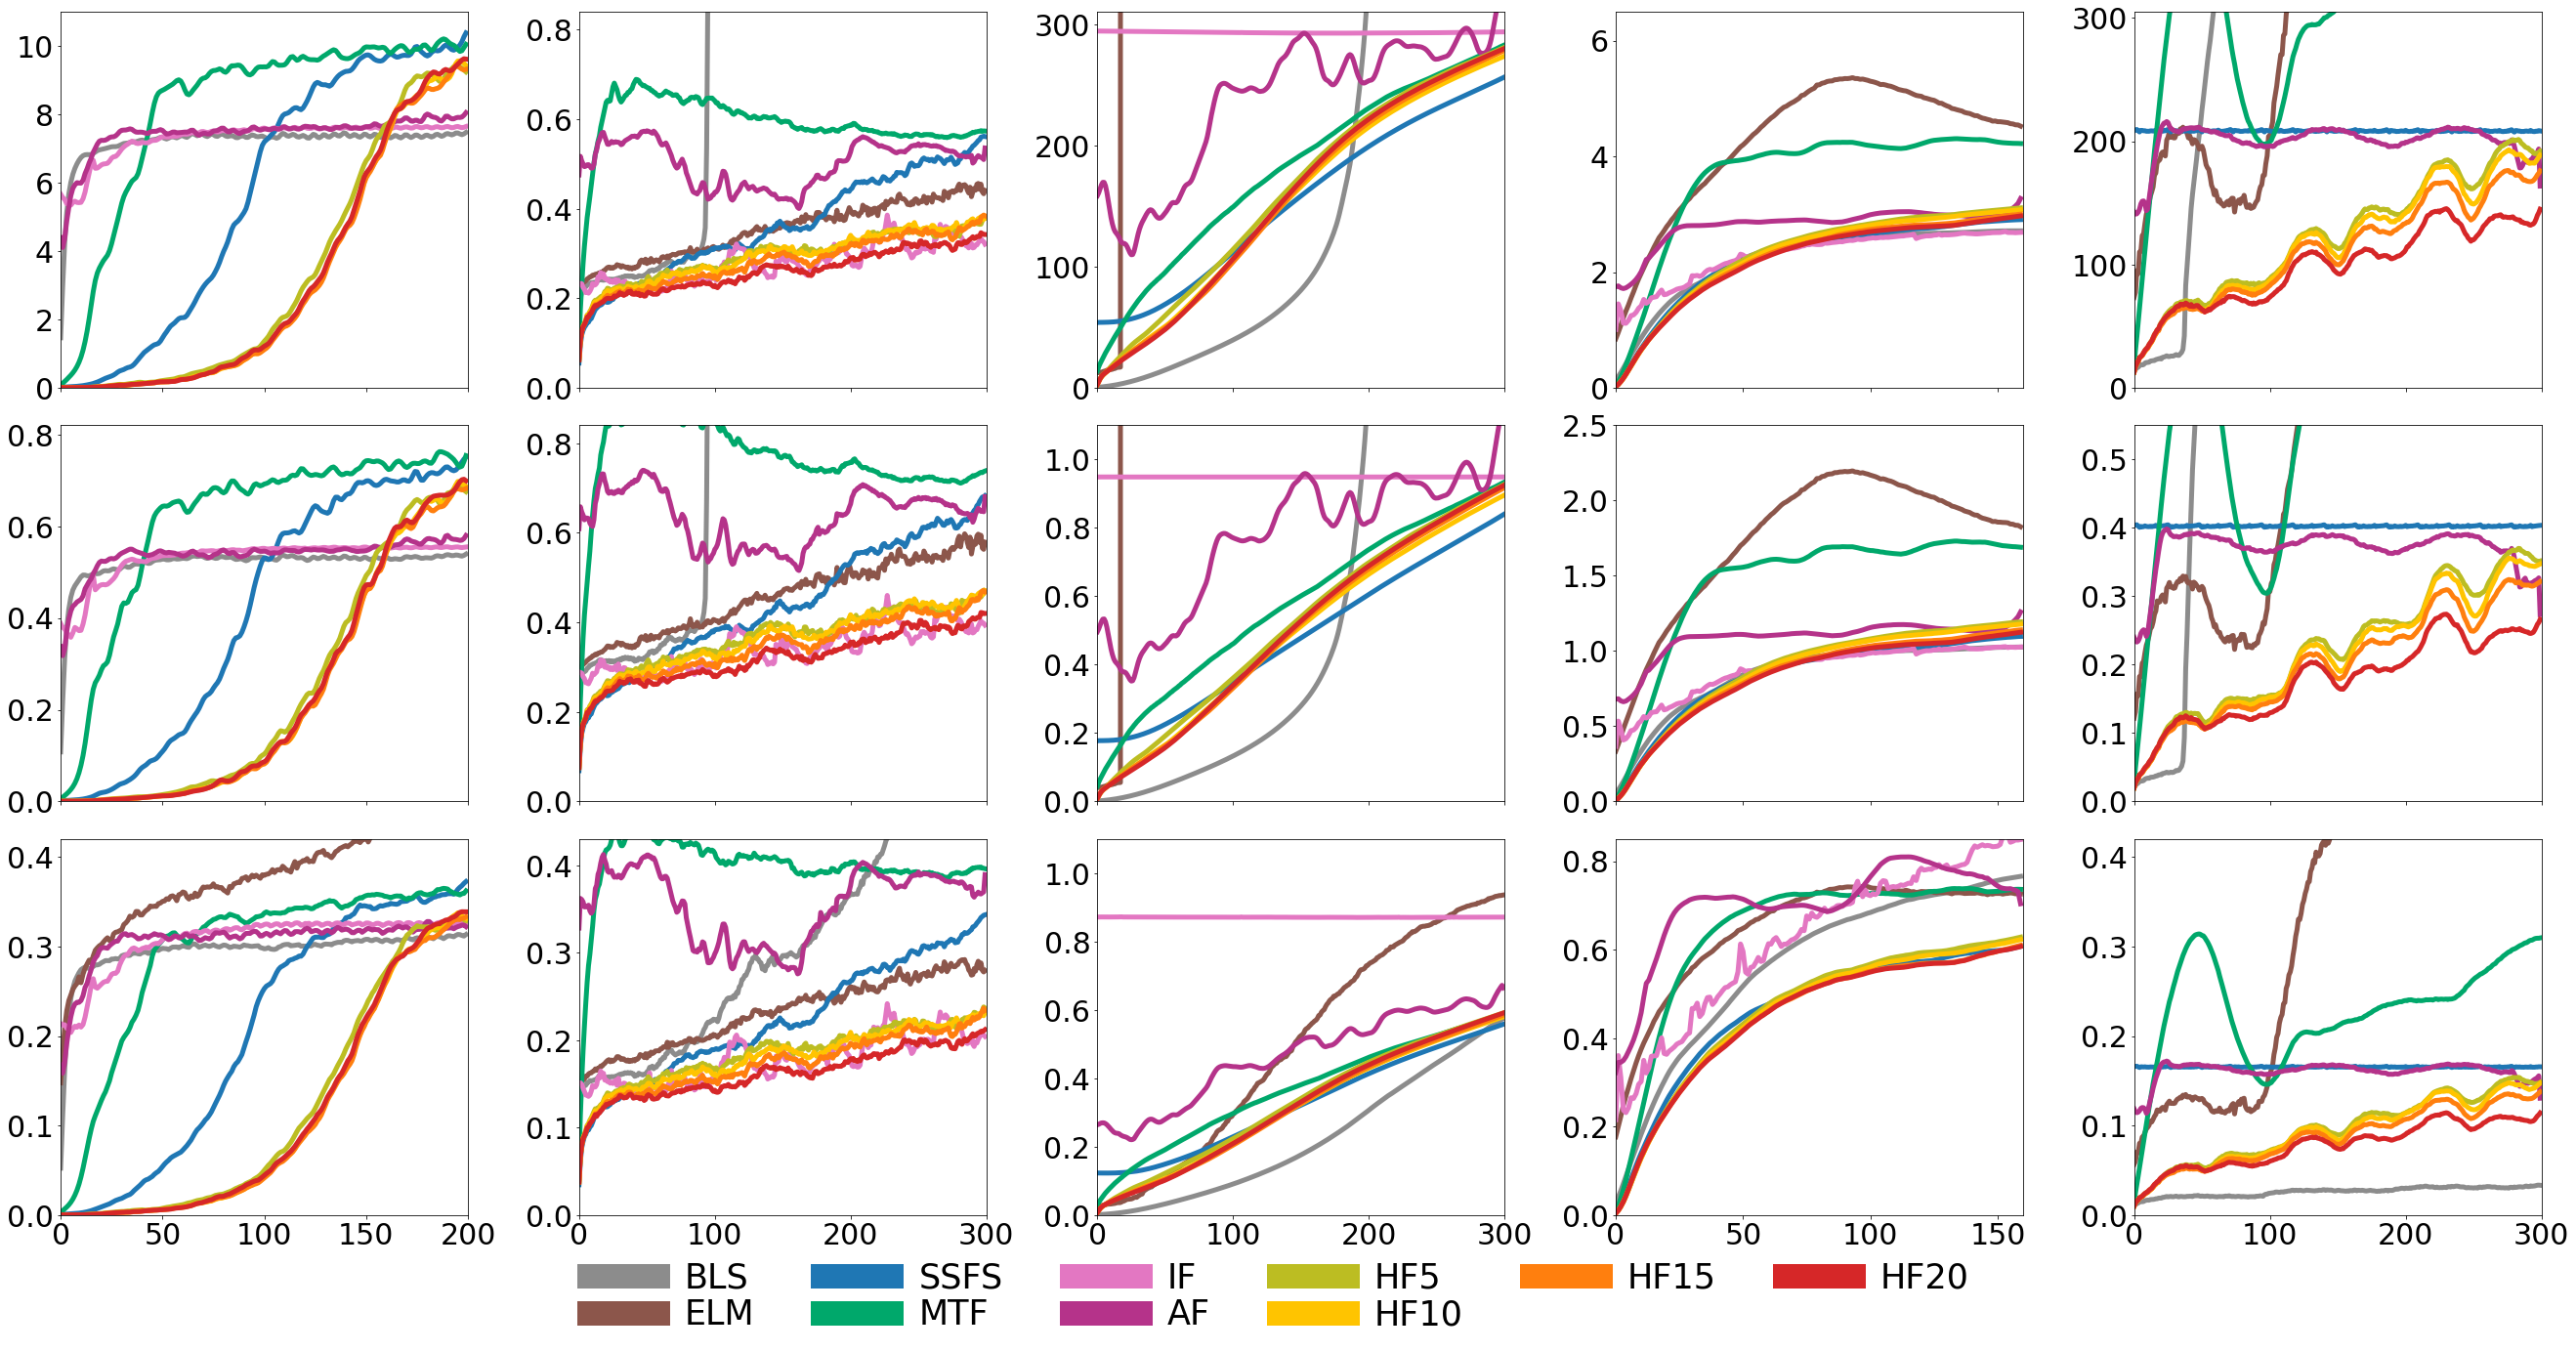

In [3]:
results = plot_comparison("all", figsize=(37, 18),fontsize=30,linewidth=5,anchor =  (0,-0.08,1,1),legsize=25)
display(results)